# Treinando uma CNN simples com o dataset MNIST

### Objetivo

Neste material, vamos implementar uma Rede Neural Convolucional (CNN) usando TensorFlow/Keras para classificação de dígitos escritos à mão utilizando o dataset MNIST.

O MNIST é um dataset fundamental para aprendizado em visão computacional, contendo imagens de dígitos manuscritos (0-9) em escala de cinza, com 60.000 imagens de treino e 10.000 de teste.

# Carregamento e Pré-processamento do Dataset (MNIST)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist

**Carregar o dataset MNIST**

`load_data()` retorna 4 arrays:

* `x_train`: 60,000 imagens 28x28 para treino
* `y_train`: 60,000 labels (0-9) correspondentes
* `x_test`: 10,000 imagens 28x28 para teste
* `y_test`: 10,000 labels para teste

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Exibindo Uma imagem por classe**

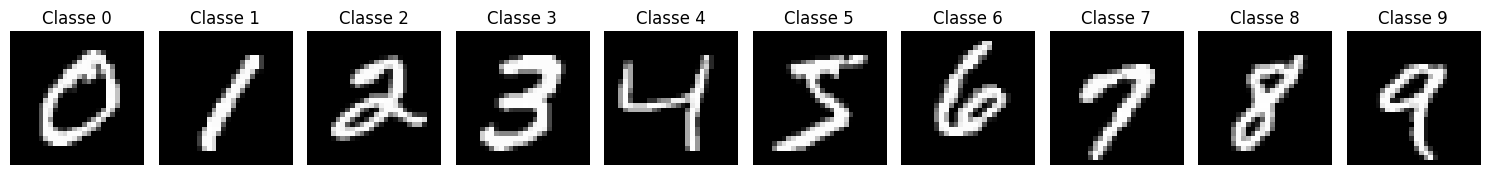

In [ ]:
classes = np.unique(y_train)
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

for i, cls in enumerate(classes):
    idx = np.where(y_train == cls)[0][0]
    axes[i].imshow(x_train[idx], cmap='gray')
    axes[i].set_title(f'Classe {cls}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Normalizar os pixels para [0, 1]**

> Por que dividir por 255?

* Valores de pixel originais variam de 0 (preto) a 255 (branco)
* Redes neurais trabalham melhor com valores entre 0 e 1
* Ajuda na convergência durante o treinamento


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Redimensionar para incluir o canal de cor (1 canal, pois é grayscale)**

> Explicação do reshape:
* -1: Mantém o número original de amostras
* 28, 28: Dimensões altura/largura
* 1: Canal de cor (escala de cinza)
* Formato necessário para camadas Conv2D no TensorFlow

**Antes do reshape**
```python
x_train.shape # (60000, 28, 28)
```

**Após do reshape**
```python
x_train.shape # (60000, 28, 28, 1)
```

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

**Converter labels para one-hot encoding (opcional, mas útil para redes com softmax)**

**O que isso faz?**

* Converte labels numéricos em vetores binários:
    * Ex: 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
* Necessário quando:
    * Usamos categorical_crossentropy como loss function
    * A saída da rede tem 10 neurônios (Softmax)

* Alternativa (se não usar one-hot):
    * Usar sparse_categorical_crossentropy e manter labels como inteiros


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Construção da CNN com TensorFlow/Keras

Vamos criar uma CNN simples com:

* Camadas Convolucionais (Conv2D) para extração de features.
* Camadas de Pooling (MaxPooling2D) para redução dimensional.
* Camadas Densas (Dense) para classificação.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [10]:
# Definir o modelo CNN
model = Sequential(name='MNIST_CNN')

# Camada de entrada
model.add(
    Input(shape=(28, 28, 1), name='input_layer')
)

In [11]:
# Primeira camada convolucional
model.add(
    Conv2D(
            filters=32,  # Número de filtros
            kernel_size=(5, 5),  # Tamanho do filtro
            activation='relu',  # Função de ativação
            name='conv1',  # Nome da camada
        )
)

# Camada de pooling
model.add(
    MaxPooling2D(
            pool_size=(2, 2),  # Tamanho do pooling
            name='pool1',  # Nome da camada
        )
)

2025-05-20 10:15:17.457098: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# Segunda camada convolucional
model.add(
    Conv2D(
            filters=64,  # Número de filtros
            kernel_size=(5, 5),  # Tamanho do filtro
            activation='relu',  # Função de ativação
            name='conv2',  # Nome da camada
        )
)

# Segunda camada de pooling
model.add(
    MaxPooling2D(
            pool_size=(2, 2),  # Tamanho do pooling
            name='pool2',  # Nome da camada
        )
)

In [13]:
# Flattening
model.add(
    Flatten(name='flatten')  # Achata a saída para um vetor
)
# Camada densa
model.add(
    Dense(
            units=128,  # Número de neurônios
            activation='relu',  # Função de ativação
            name='dense1',  # Nome da camada
        )
)
# Camada de saída
model.add(
    Dense(
            units=10,  # Número de classes
            activation='softmax',  # Função de ativação para classificação
            name='output_layer',  # Nome da camada
        )
)

In [14]:
model.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,586 (721.04 KB)

 Trainable params: 184,586 (721.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Treinamento e Validação

In [16]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/30


2025-05-20 10:15:33.902071: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.4122 - loss: 1.9734 - val_accuracy: 0.8212 - val_loss: 0.6164
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8304 - loss: 0.5809 - val_accuracy: 0.8696 - val_loss: 0.4422
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8690 - loss: 0.4409 - val_accuracy: 0.8903 - val_loss: 0.3653
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8890 - loss: 0.3699 - val_accuracy: 0.9060 - val_loss: 0.3118
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9030 - loss: 0.3205 - val_accuracy: 0.9151 - val_loss: 0.2743
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9151 - loss: 0.2832 - val_accuracy: 0.9260 - val_loss: 0.2374
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9249 - loss: 0.2483 - val_accuracy: 0.9323 - val_loss: 0.2145
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9298 - loss: 0.2291 - val_accurac

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

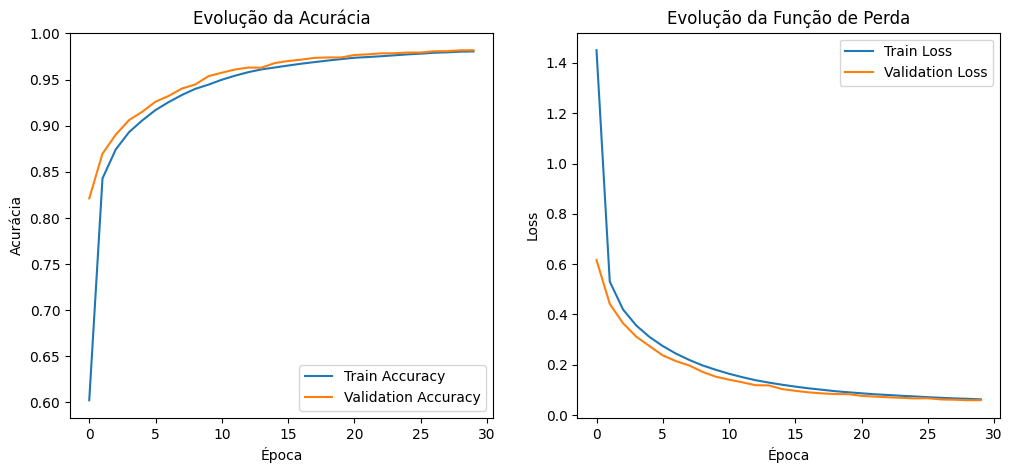

In [18]:
plt.figure(figsize=(12, 5))

# Gráfico de Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evolução da Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Análise dos Gráficos Esperados

### Comportamento Ideal:
| Gráfico | Treino | Validação | Observação |
| ----- | ----- | ----- | ----- |
| Acurácia | Aumenta suave até estabilizar | Segue padrão similar ao treino | Diferença < 2-3% |
| Perda | Diminui suave até estabilizar	| Diminui e depois estabiliza | Validação deve parar de melhorar quando treino estabilizar |

### Problemas Comuns e Soluções:

1. Underfitting (Subajuste):

    * Sintomas: Baixa acurácia em ambos treino/validação
    * Causas: Modelo muito simples, poucas épocas
    * Solução: Aumentar capacidade do modelo ou tempo de treino

2. Overfitting (Sobreajuste):

    * Sintomas: Acurácia alta no treino mas baixa na validação
    * Visualização: Divergência crescente entre curvas
    * Soluções:
        ```python
            model.fit(...,
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
                        )
        ```

3. Oscilações na Perda:

    * Causa: Learning rate muito alto
    * Ajuste:
        ```python
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              ...)
        ```

# Avaliação de Desempenho

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [20]:
# Predição no conjunto de teste
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


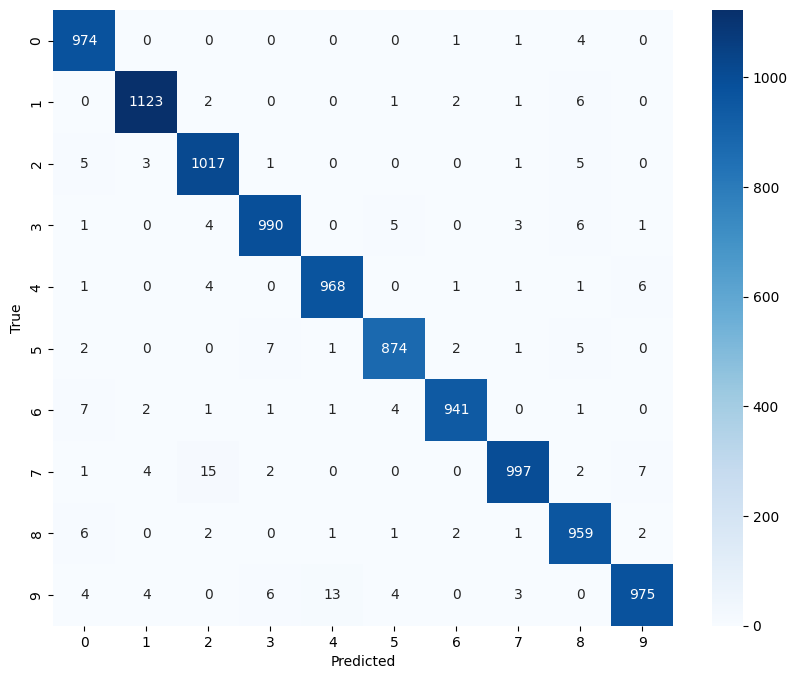

In [21]:
# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Relatório de Classificação
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [24]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print(f"Acurácia no Treino: {train_acc:.4f}")
print(f"Perda no Treino: {train_loss:.4f}")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Acurácia no Teste: {test_acc:.4f}")
print(f"Perda no Teste: {test_loss:.4f}")

2025-05-20 10:34:01.613163: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Acurácia no Treino: 0.9816
Perda no Treino: 0.0600
Acurácia no Teste: 0.9818
Perda no Teste: 0.0595


In [25]:
diff_percentual = abs(train_acc - test_acc) * 100

if diff_percentual > 5:
    print(f'Warning: A diferença percentual entre a acurácia de treino e teste é {diff_percentual:.2f}%')
else:
    print(f'A diferença percentual entre a acurácia de treino e teste é {diff_percentual:.2f}%.')
    print('O modelo parece estar bem ajustado.')


A diferença percentual entre a acurácia de treino e teste é 0.02%.
O modelo parece estar bem ajustado.


# Salvando o modelo

In [26]:
import os

def save_model(model, name_model="model", path='model'):
    """
    Salva a arquitetura (JSON) e os pesos (HDF5) de um modelo Keras.
    """
    # Cria o diretório se não existir
    os.makedirs(path, exist_ok=True)

    # Salva arquitetura
    model_json = model.to_json()
    with open(f"{path}/{name_model}.json", "w") as json_file:
        json_file.write(model_json)

    # Salva os pesos no formato recomendado
    weights_path = f"{path}/{name_model}.weights.h5"
    model.save_weights(weights_path)

    print(f"✅ Modelo '{name_model}' salvo com sucesso:")
    print(f"  • Arquitetura: {path}/{name_model}.json")
    print(f"  • Pesos:       {weights_path}")

In [27]:
save_model(
    model = model,
    name_model = "model_v01",
    path = 'models'
)

✅ Modelo 'model_v01' salvo com sucesso:
  • Arquitetura: models/model_v01.json
  • Pesos:       models/model_v01.weights.h5


# Carrega o modelo salvo

In [29]:
from tensorflow.keras.models import model_from_json

def load_model(name_model, path='model',
               compile_model=True, compile_args=None):
    """
    Carrega um modelo salvo em JSON + pesos .weights.h5.
    Opcionalmente compila o modelo ao carregar.
    """
    # Carrega arquitetura
    with open(f'{path}/{name_model}.json', 'r') as json_file:
        loaded_model_json = json_file.read()

    loaded_model = model_from_json(loaded_model_json)

    # Carrega pesos
    weights_path = f"{path}/{name_model}.weights.h5"
    loaded_model.load_weights(weights_path)

    print(f"✅ Modelo '{name_model}' carregado com sucesso.")

    # Compila se solicitado
    if compile_model:
        compile_args = compile_args or {
            'optimizer': 'adam',
            'loss': 'sparse_categorical_crossentropy',
            'metrics': ['accuracy']
        }
        loaded_model.compile(**compile_args)
        print("🔧 Modelo compilado.")

    return loaded_model

In [30]:
compile_args = {
    'optimizer': tf.keras.optimizers.Adam(learning_rate=0.0001),
    'loss': 'sparse_categorical_crossentropy',
    'metrics': ['accuracy']
}

modelo_carregado = load_model(
    name_model = 'model_v01',
    path = 'models',
    compile_model = True,
    compile_args = compile_args
)

✅ Modelo 'model_v01' carregado com sucesso.
🔧 Modelo compilado.


In [31]:
modelo_carregado.summary()

Model: "MNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,586 (721.04 KB)

 Trainable params: 184,586 (721.04 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Treino
## Predição no conjunto de treino
y_pred_train = modelo_carregado.predict(x_train, verbose=0)
## Convertendo as previsões para classes
y_pred_train = np.argmax(y_pred_train, axis=1)
## Convertendo os rótulos para classes
y_true_train = np.argmax(y_train, axis=1)
## Acurácia no conjunto de treino
train_acc = float(sum(y_pred_train == y_true_train) / y_true_train.shape[0]) * 100


# Teste
## Predição no conjunto de teste
y_pred_test = modelo_carregado.predict(x_test, verbose=0)
## Convertendo as previsões para classes
y_pred_test = np.argmax(y_pred_test, axis=1)
## Convertendo os rótulos para classes
y_true_test = np.argmax(y_test, axis=1)
## Acurácia no conjunto de teste
test_acc = float(sum(y_pred_test == y_true_test) / y_true_test.shape[0]) * 100

print(f"Acurácia no Treino: {train_acc:.2f}")
print(f"Acurácia no Teste: {test_acc:.2f}")

2025-05-20 10:40:28.541286: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Acurácia no Treino: 98.16
Acurácia no Teste: 98.18
